In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import country_converter as coco

In [4]:
df = pd.read_csv(r"C:\Users\simbi\Ironhack\Proyecto\datos_proyecto\attacks.csv", encoding ="unicode_escape")

#df = pd.read_csv(r"C:\Users\nuc_humbertore\Ironhack\primer_proyecto_DAPT\datos_proyecto\attacks.csv", encoding ="unicode_escape")

# Limpieza de los datos
## 2.2 filas

In [5]:
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

trim_all_columns(df)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df["Sex"] = df["Sex "].str.strip(to_strip=None)


In [14]:
df.dropna(how='all',inplace = True)

In [15]:
#Borramos las filas con valor 0 de Case Number

igual_a_0 = df[ df["Case Number"] == '0' ].index
# Eliminar estos índices de fila del dataFrame
df.drop(igual_a_0 , inplace=True)

In [16]:
# para comprobar cuantos nulos hay por fila y listar los 10 que tienen más

nulos = df.isnull().sum(axis=1)
nulos.sort_values(ascending = False).head(10).index
nul = nulos.sort_values(ascending = False).head(10).index
list(nul)

[6130, 4976, 5036, 6122, 6165, 5029, 6108, 6081, 6080, 5812]

In [17]:
#borramos los filas con menos de 10 valores que no son Null

df.dropna(thresh=10, inplace=True)

## limpieza Fatal

In [27]:
df.rename(columns = {"Fatal (Y/N)":'Fatal'}, inplace = True)
df
df["Fatal"]=df["Fatal"].str.lower()
df["Fatal"].unique()
df["Fatal"] = df.Fatal.str.replace(' ', '')
df["Fatal"] = df.Fatal.str.replace('2017', "unknown")
df["Fatal"] = df.Fatal.str.replace("m","unknown")
df["Fatal"] = df.Fatal.str.replace("unkown","df["Sex"]")
df.Fatal.fillna(value="unknown", inplace=True)
df["Fatal"].unique()

array(['n', 'y', 'unknown'], dtype=object)

## limpieza Sex

In [35]:
df["Sex"]=df["Sex"].str.lower()


In [36]:
df.loc[(df.loc[:, 'Sex'] != "f") & (df.loc[:, 'Sex'] != "m")] = "notknown"

In [37]:
df.sample(100)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Sex
4692,1942.11.25,25-Nov-1942,1942.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Umkomaas,Swimming,E.W. Bilton,M,...,"M. Levine,GSAF",1942.11.25-Bilton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1942.11.25,1942.11.25,1611.0,NaN,NaN,m
1476,2006.05.31,31-May-2006,2006.0,Unprovoked,USA,Hawaii,O'ahu,Spearfishing,Ron Deguilmo,M,...,"P. Immerz; Honolulu Advertiser, 6/1/2006",2006.05.31-Deguilmo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.05.31,2006.05.31,4827.0,NaN,NaN,m
6034,1849.06.08.a,08-Jun-1849,1849.0,Unprovoked,USA,Florida,"Pensacola, Escambia County",Bathing,Mrs. Cracton,F,...,"Adams Sentinel, 8/6/1849",1849.06.08.a-Cracton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1849.06.08.a,1849.06.08.a,269.0,NaN,NaN,f
4855,1937.02.11,11-Feb-1937,1937.0,Unprovoked,AUSTRALIA,New South Wales,Kempsey,Swimming ashore after launch capsized,Mr. Redman,M,...,"Canberra Times, 2/12/1937",1937.02.11-Redman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1937.02.11,1937.02.11,1448.0,NaN,NaN,m
2580,1991.10.05,05-Oct-1991,1991.0,Unprovoked,USA,California,"Horseshoe Reef, Scott Creek, Davenport, Santa ...",Surfing,John Ferrerira,M,...,"R. Collier, pp.126-128 ; Orlando Sentinel, 10/...",1991.10.05-Ferreira_Collier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1991.10.05,1991.10.05,3723.0,NaN,NaN,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,1988.08.11,11-Aug-1988,1988.0,Unprovoked,USA,California,"Klamath River, Del Norte County",Surfing,Carl Lafazio,M,...,"R. Collier, pp.102-104",1988.08.11-LaFazio_Collier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1988.08.11,1988.08.11,3583.0,NaN,NaN,m
5065,1929.10.02,02-Oct-1929,1929.0,Unprovoked,SPAIN,Valencia,Nasareth Beach,Fishing,Vicente Bonet,M,...,C. Moore. GSAF,1929.10.02-Bonet-Valencia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1929.10.02,1929.10.02,1238.0,NaN,NaN,m
6190,ND-0138,Before 1909,0.0,Unprovoked,AUSTRALIA,Queensland,Moreton Bay,Fell into the water,Lieutenant Hexton,M,...,"Brisbane Courier, 1/28/1909",ND-0138-Hexton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0138,ND-0138,113.0,NaN,NaN,m
4694,1942.11.21,21-Nov-1942,1942.0,Sea Disaster,INDIAN OCEAN,NaN,Bound from Cape Town for St. Helena,"On 6-Nov-1942, the German submarine U-68 sank ...",male,M,...,"Coppleson (1962), pp.207 & 258",1942.11.21-City-of-Cairo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1942.11.21,1942.11.21,1609.0,NaN,NaN,m


# Limpieza de los datos
## 2.2 Columnas

In [7]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [8]:
#Después de una exploración del df borramos las columnas
#con datos no numéricos y que no se pueden categorizar 
#P. ej.enlaces y códigos repetidos y columnas basura sin datos

In [9]:
df.drop(['pdf', 'href formula', 'href','Name','Injury','Species ','Investigator or Source',
       'Case Number.1', 'Case Number.2','Unnamed: 22','Unnamed: 23'], axis= 1, inplace=True)

In [10]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Sex ', 'Age', 'Fatal (Y/N)', 'Time', 'original order'],
      dtype='object')

# 3 Dar formato a los datos

## Normalizar columna Age a int or float

In [11]:
df["Age"] = df.Age.str.strip()

In [12]:
df["Age_normalize"] = pd.to_numeric(df['Age'], errors='coerce', downcast="integer")

In [13]:
df["Age_normalize"].fillna(value = 0, inplace=True)

In [14]:
df["Age_normalize"] = df["Age_normalize"].astype(int)

In [15]:
df["Age_normalize"].unique()

array([57, 11, 48,  0, 18, 52, 15, 12, 32, 10, 21, 34, 30, 60, 33, 29, 54,
       41, 37, 56, 19, 25, 69, 38, 55, 35, 46, 45, 14, 28, 20, 24, 26, 49,
       22,  7, 31, 17, 40, 13, 42,  3,  8, 50, 16, 82, 73, 68, 51, 39, 58,
       47, 61, 65, 36, 66, 43,  9, 72, 59,  6, 27, 64, 23, 71, 44, 62, 63,
       70, 53, 77, 74,  5, 86, 84, 75, 87, 67,  1, 81, 78])

<AxesSubplot:>

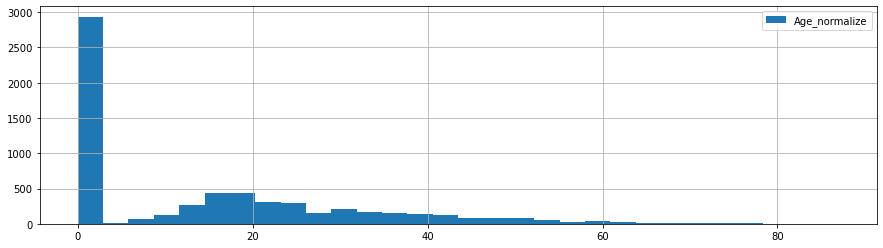

In [16]:
df.Age_normalize.hist(legend=True,bins=30, figsize = [15,4])

## Normalizar columna Date a datetime

In [84]:
"""
Para normalizar las fechas rellenamos los NaN con una fecha futura para 
después poder excluirla facilmente a la hora de trabajr con los datos
de esa columna

Exclude_date= "2030-01-01 00:00:00"

"""

'\nPara normalizar las fechas rellenamos los NaN con una fecha futura para \ndespués poder excluirla facilmente a la hora de trabajr con los datos\nde esa columna\n\nExclude_date= "2030-01-01 00:00:00"\n\n'

In [85]:
df['Date'].isnull().sum()

1

In [86]:
df['Date']

0        25-Jun-2018
1        18-Jun-2018
2        09-Jun-2018
3        08-Jun-2018
4        04-Jun-2018
            ...     
6298     Before 1903
6299       1900-1905
6300       1883-1889
6301       1845-1853
25722            NaN
Name: Date, Length: 6303, dtype: object

In [87]:
#convertimos Date a datetime para la columna 'Date_normalize'

df['Date_normalize'] = pd.to_datetime(df['Date'], errors ='coerce')

In [88]:
df['Date_normalize'].isnull().sum()

845

In [89]:
df['Date_normalize'].dtypes

dtype('<M8[ns]')

In [90]:
# Rellenanos los Nan con una fecha rara para poder filtrar luego. 
# OJO! esto convierte toda la columna en float
Exclude_date = "2030-01-01 00:00:00"
df['Date_normalize'].fillna(value = Exclude_date , inplace=True)

In [91]:
df['Date_normalize']

0       2018-06-25
1       2018-06-18
2       2018-06-09
3       2018-06-08
4       2018-06-04
           ...    
6298    2030-01-01
6299    2030-01-01
6300    2030-01-01
6301    2030-01-01
25722   2030-01-01
Name: Date_normalize, Length: 6303, dtype: datetime64[ns]

In [92]:
df['Date_normalize'].isnull().sum()

0

In [93]:
df['Date_normalize'].dtypes

dtype('<M8[ns]')

In [94]:
#volvemos a convertir la columna de float a datetime 
df['Date_normalize'] = pd.to_datetime(df['Date_normalize'], errors ='coerce')

In [95]:
df['Date_normalize']

0       2018-06-25
1       2018-06-18
2       2018-06-09
3       2018-06-08
4       2018-06-04
           ...    
6298    2030-01-01
6299    2030-01-01
6300    2030-01-01
6301    2030-01-01
25722   2030-01-01
Name: Date_normalize, Length: 6303, dtype: datetime64[ns]

In [96]:
df['Date_normalize'].isnull().sum()

0

In [97]:
df['Date_normalize'].dtypes

dtype('<M8[ns]')

In [98]:
df['Year_Date'] = df['Date_normalize'].dt.year

In [99]:
df['Year_Date'].isnull().sum()

0

In [100]:
df['Month_Date'] = df['Date_normalize'].dt.month

In [34]:
df['Day_Date'] = df['Date_normalize'].dt.day_name()

In [35]:
df.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Fatal (Y/N),Time,original order,Age_normalize,Date_normalize,Year_Date,Month_Date,Day_Date
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,N,18h00,6303.0,57,2018-06-25,2018,6,Monday
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,N,14h00 -15h00,6302.0,11,2018-06-18,2018,6,Monday
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,N,07h45,6301.0,48,2018-06-09,2018,6,Saturday


In [36]:
df['Type'].value_counts() 

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

"""
para estudiar:
la manera en que si hay menos valores que x(en cantidad) en una columna esta pase a ser "undefined"
o algo por el estilo. p ej en "Type" aparee Boatomg que es un error de tiping o Questionable que solo hay 2 valores 
"""

In [38]:
# limpiar columnas de espacios

columnas = df.columns
columnas = map(lambda x: x.strip(), columnas)
df.columns = columnas



In [39]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Sex', 'Age', 'Fatal (Y/N)', 'Time', 'original order',
       'Age_normalize', 'Date_normalize', 'Year_Date', 'Month_Date',
       'Day_Date'],
      dtype='object')

In [ ]:
df["Country"] = coco.convert(names=df["Country"], to='name_short')
df["Country"]=df["Country"].str.lower()

In [ ]:
df["Country"].nunique()

In [83]:
year_filtrado = df[(df.Year_Date < 2028)]

year_filtrado['Year_Date'].hist(legend=True,bins= 200, figsize = [15,4])

AttributeError: 'DataFrame' object has no attribute 'Year_Date'

In [73]:
sns.catplot(x='Age', kind="count", palette="ch:.25")

ValueError: Could not interpret input 'Age'

<AxesSubplot:>

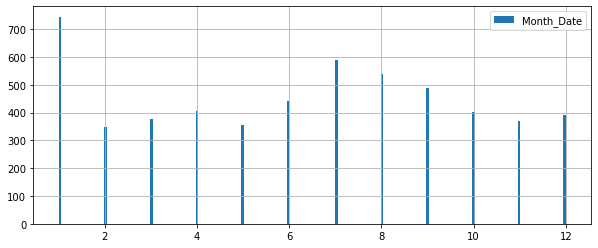

In [53]:
year_filtrado['Month_Date'].hist(legend=True,bins= 200, figsize = [10,4])


<AxesSubplot:>

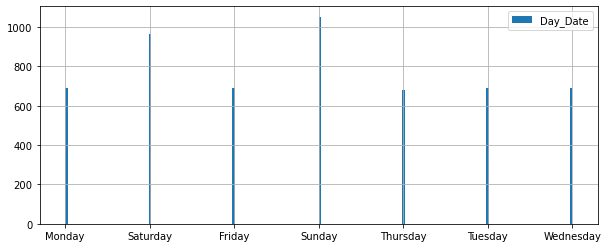

In [54]:
year_filtrado['Day_Date'].hist(legend=True,bins= 200, figsize = [10,4])

In [43]:
type(year_filtrado)

# newdf = df[(df.Year_Date != 0)]

pandas.core.frame.DataFrame

<AxesSubplot:>

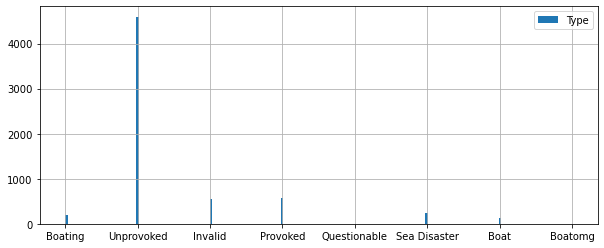

In [55]:
df['Type'].hist(legend=True,bins= 200, figsize = [10,4])

In [102]:
year_filtrado.sort_values("Year_Date", ascending=True)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Fatal (Y/N),Time,original order,Age_normalize,Date_normalize,Year_Date,Month_Date,Day_Date
6160,1703.03.26,26-Mar-1703,1703.0,Unprovoked,BARBADOS,Southwest coast,Carlisle Bay,Swimming,M,19,N,Night,143.0,19,1703-03-26,1703,3,Monday
6159,1721.06.00,June 1721,1721.0,Unprovoked,ITALY,Sardinia,"Ponte della Maddelena,",Swimming,M,NaN,Y,NaN,144.0,0,1721-06-01,1721,6,Sunday
6158,1723.00.00,1723,1723.0,Unprovoked,ROATAN,NaN,NaN,NaN,M,NaN,NaN,NaN,145.0,0,1723-01-01,1723,1,Friday
6157,1733.00.00,1733,1733.0,Invalid,ICELAND,Bardestrand,Talkknefiord,NaN,NaN,NaN,NaN,NaN,146.0,0,1733-01-01,1733,1,Thursday
6155,1742.12.17,17-Dec-1742,1742.0,Unprovoked,NaN,NaN,Carlisle Bay,Swimming,M,NaN,Y,NaN,148.0,0,1742-12-17,1742,12,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,2018.04.14,14-Apr-2018,2018.0,Unprovoked,BAHAMAS,New Providence,Nirvana Beach,Surfing,M,NaN,N,09h30,6273.0,0,2018-04-14,2018,4,Saturday
29,2018.04.15.a,15-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,"Cobblestones, Margaret River Area",Surfing,M,37,N,08h00,6274.0,37,2018-04-15,2018,4,Sunday
28,2018.04.15.b,15-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,"Lefthanders, Margaret River Area",Surfing,M,41,N,NaN,6275.0,41,2018-04-15,2018,4,Sunday
26,2018.04.15.d,15-Apr-2018,2018.0,Unprovoked,THAILAND,Hua Hin,Sai Noi Beach,Swimming,M,54,N,NaN,6277.0,54,2018-04-15,2018,4,Sunday


In [78]:
df["Country filtrado"] = df["Country"].value_counts() < 2000


In [106]:
df.groupby("Age_normalize").plot.bar()

KeyError: 'Age_normalize'